In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

In [3]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable


In [4]:
movie=pd.read_csv("https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/association%20rules/my_movies.csv")
movie.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [5]:
# Get list of categorical variables
s = (movie.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['V1', 'V2', 'V3', 'V4', 'V5']


In [6]:
num_movie = movie.iloc[:,5:15]
num_movie.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [7]:
#Apriori Algorithm

In [8]:
frequent_itemsets_ap = apriori(num_movie, min_support=0.15, use_colnames=True,verbose=1)
print(frequent_itemsets_ap.head())

Processing 27 combinations | Sampling itemset size 3
   support         itemsets
0      0.6    (Sixth Sense)
1      0.7      (Gladiator)
2      0.2          (LOTR1)
3      0.2  (Harry Potter1)
4      0.6        (Patriot)


C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [9]:
frequent_itemsets_ap.sort_values("support", ascending = False).shape

(13, 2)

In [10]:
rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.1)
print(rules_ap.head())


     antecedents    consequents  antecedent support  consequent support  \
0    (Gladiator)  (Sixth Sense)                 0.7                 0.6   
1  (Sixth Sense)    (Gladiator)                 0.6                 0.7   
2  (Sixth Sense)      (Patriot)                 0.6                 0.6   
3      (Patriot)  (Sixth Sense)                 0.6                 0.6   
4   (Green Mile)  (Sixth Sense)                 0.2                 0.6   

   support  confidence      lift  leverage  conviction  
0      0.5    0.714286  1.190476      0.08         1.4  
1      0.5    0.833333  1.190476      0.08         1.8  
2      0.4    0.666667  1.111111      0.04         1.2  
3      0.4    0.666667  1.111111      0.04         1.2  
4      0.2    1.000000  1.666667      0.08         inf  


In [11]:
rules_ap[(rules_ap.support > 0.015) & (rules_ap.confidence > 0.4)].sort_values("confidence", ascending = False).shape

(15, 9)

In [12]:
rules_ap['lhs items'] = rules_ap['antecedents'].apply(lambda x:len(x) )
rules_ap[rules_ap['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
12,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,2
10,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,2
11,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,2


(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'Gladiator'),
  Text(1.5, 0, 'Patriot'),
  Text(2.5, 0, 'Sixth Sense')])

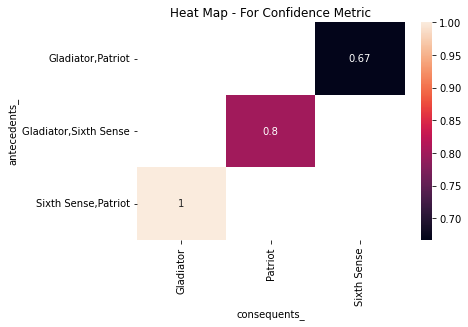

In [13]:
rules_ap['antecedents_'] = rules_ap['antecedents'].apply(lambda a: ','.join(list(a)))
rules_ap['consequents_'] = rules_ap['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = rules_ap[rules_ap['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'confidence')
# Generate a heatmap with annotations 
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [14]:
rules_ap_li = association_rules(frequent_itemsets_ap, metric="lift", min_threshold=0.8)
print(rules_ap_li.shape)

(16, 9)


In [15]:
rules_ap_li['lhs items'] = rules_ap_li['antecedents'].apply(lambda x:len(x) )
rules_ap_li[rules_ap_li['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
12,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,2
10,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,2
11,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,2


(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'Gladiator'),
  Text(1.5, 0, 'Patriot'),
  Text(2.5, 0, 'Sixth Sense')])

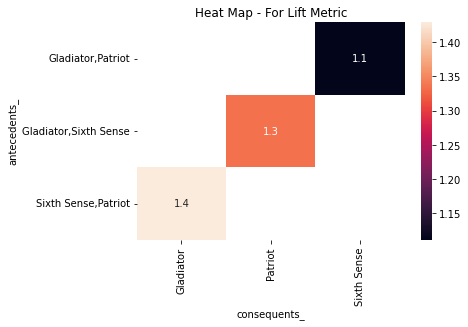

In [16]:
# Replace frozen sets with strings
rules_ap_li['antecedents_'] = rules_ap_li['antecedents'].apply(lambda a: ','.join(list(a)))
rules_ap_li['consequents_'] = rules_ap_li['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules_ap_li[rules_ap_li['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')
# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Lift Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [17]:
#FpGrowth Algorithm

In [18]:
frequent_itemsets_fp=fpgrowth(num_movie, min_support=0.1, use_colnames=True,verbose=1)
print(frequent_itemsets_fp.shape)

10 itemset(s) from tree conditioned on items ()
3 itemset(s) from tree conditioned on items (Sixth Sense)
3 itemset(s) from tree conditioned on items (Green Mile)
3 itemset(s) from tree conditioned on items (LOTR2)
7 itemset(s) from tree conditioned on items (Harry Potter1)
15 itemset(s) from tree conditioned on items (LOTR1)
0 itemset(s) from tree conditioned on items (Gladiator)
1 itemset(s) from tree conditioned on items (Patriot)
3 itemset(s) from tree conditioned on items (Braveheart)
1 itemset(s) from tree conditioned on items (Harry Potter2)
7 itemset(s) from tree conditioned on items (LOTR)
(53, 2)


C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [19]:
frequent_itemsets_fp.sort_values("support", ascending = False).head()

,support,itemsets
5,0.7,(Gladiator)
0,0.6,(Sixth Sense)
41,0.6,"(Gladiator, Patriot)"
6,0.6,(Patriot)
10,0.5,"(Gladiator, Sixth Sense)"


In [20]:
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.8)
print(rules_fp.head())

                antecedents    consequents  antecedent support  \
0             (Sixth Sense)    (Gladiator)                 0.6   
1  (Gladiator, Sixth Sense)      (Patriot)                 0.5   
2    (Sixth Sense, Patriot)    (Gladiator)                 0.4   
3              (Green Mile)  (Sixth Sense)                 0.2   
4   (Green Mile, Gladiator)  (Sixth Sense)                 0.1   

   consequent support  support  confidence      lift  leverage  conviction  
0                 0.7      0.5    0.833333  1.190476      0.08         1.8  
1                 0.6      0.4    0.800000  1.333333      0.10         2.0  
2                 0.7      0.4    1.000000  1.428571      0.12         inf  
3                 0.6      0.2    1.000000  1.666667      0.08         inf  
4                 0.6      0.1    1.000000  1.666667      0.04         inf  


In [21]:
rules_fp[(rules_fp.support > 0.1) & (rules_fp.confidence > 0.4)].sort_values("confidence", ascending = False).shape

(8, 9)

In [22]:
rules_fp['lhs items'] = rules_fp['antecedents'].apply(lambda x:len(x) )
rules_fp[rules_fp['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
126,"(LOTR, Sixth Sense)","(Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf,2
86,"(Green Mile, LOTR2, Harry Potter1)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3
84,"(LOTR1, Harry Potter1, Sixth Sense)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3
81,"(LOTR1, Green Mile, LOTR2)","(Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3
80,"(LOTR1, Green Mile, Harry Potter1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3


(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5]),
 [Text(0.5, 0, 'Gladiator'),
  Text(2.5, 0, 'Green Mile'),
  Text(4.5, 0, 'Green Mile,Harry Potter1'),
  Text(6.5, 0, 'Green Mile,LOTR2,Harry Potter1'),
  Text(8.5, 0, 'Green Mile,Sixth Sense'),
  Text(10.5, 0, 'Harry Potter1,Sixth Sense'),
  Text(12.5, 0, 'LOTR,Sixth Sense'),
  Text(14.5, 0, 'LOTR1,Green Mile'),
  Text(16.5, 0, 'LOTR1,Green Mile,LOTR2'),
  Text(18.5, 0, 'LOTR1,Harry Potter1'),
  Text(20.5, 0, 'LOTR1,LOTR2'),
  Text(22.5, 0, 'LOTR1,Sixth Sense'),
  Text(24.5, 0, 'LOTR2,Harry Potter1'),
  Text(26.5, 0, 'LOTR2,Sixth Sense'),
  Text(28.5, 0, 'Sixth Sense')])

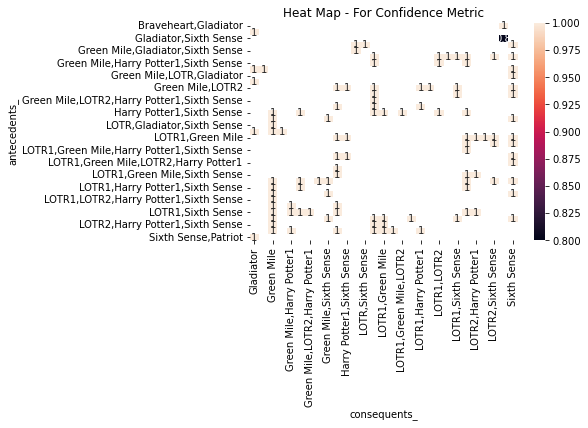

In [23]:
rules_fp['antecedents_'] = rules_fp['antecedents'].apply(lambda a: ','.join(list(a)))
rules_fp['consequents_'] = rules_fp['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = rules_fp[rules_fp['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'confidence')
# Generate a heatmap with annotations 
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [24]:
rules_fp_li = association_rules(frequent_itemsets_fp, metric="lift", min_threshold=0.8)
print(rules_fp_li.shape)

(246, 9)


In [25]:
rules_fp_li['lhs items'] = rules_fp_li['antecedents'].apply(lambda x:len(x) )
rules_fp_li[rules_fp_li['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
184,"(Green Mile, LOTR2)","(LOTR1, Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,2
58,"(LOTR2, Sixth Sense)","(Green Mile, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,2
186,"(LOTR2, Harry Potter1)","(LOTR1, Green Mile, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,2
157,"(Green Mile, Harry Potter1)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,2
156,"(LOTR1, Sixth Sense)","(Green Mile, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,2


(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5, 30.5, 32.5]),
 [Text(0.5, 0, 'Braveheart'),
  Text(2.5, 0, 'Gladiator,Sixth Sense'),
  Text(4.5, 0, 'Green Mile,Gladiator'),
  Text(6.5, 0, 'Green Mile,Harry Potter1,Sixth Sense'),
  Text(8.5, 0, 'Green Mile,LOTR2'),
  Text(10.5, 0, 'Green Mile,LOTR2,Sixth Sense'),
  Text(12.5, 0, 'Harry Potter1'),
  Text(14.5, 0, 'LOTR'),
  Text(16.5, 0, 'LOTR,Sixth Sense'),
  Text(18.5, 0, 'LOTR1,Green Mile'),
  Text(20.5, 0, 'LOTR1,Green Mile,LOTR2'),
  Text(22.5, 0, 'LOTR1,Harry Potter1'),
  Text(24.5, 0, 'LOTR1,LOTR2'),
  Text(26.5, 0, 'LOTR1,LOTR2,Sixth Sense'),
  Text(28.5, 0, 'LOTR2'),
  Text(30.5, 0, 'LOTR2,Harry Potter1,Sixth Sense'),
  Text(32.5, 0, 'Patriot')])

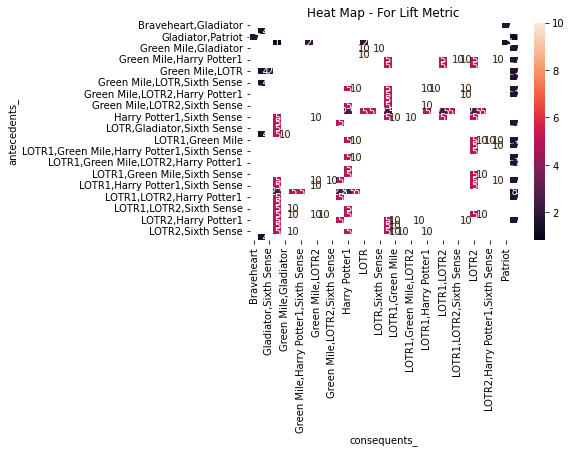

In [26]:
# Replace frozen sets with strings
rules_fp_li['antecedents_'] = rules_fp_li['antecedents'].apply(lambda a: ','.join(list(a)))
rules_fp_li['consequents_'] = rules_fp_li['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules_fp_li[rules_fp_li['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')
# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Lift Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)